In [1]:
# Script Name: EDA Analysis on the Datasets
# Author: Rahul Kumar
# Date: 11/3/22
# Description: Gain some insights on the dataset

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Strings for using in writing of files

filepath = '../../UNSW-PROJECT-DATA/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
    
images = 'images/' #My folder specific image folder

csv = '.csv'
xlsx = '.xlsx'

In [3]:
c_file = 'combined'

data = pd.read_csv(filepath+c_file+csv)
data = data.drop(data.columns[0], axis=1)

In [4]:
data.head()

,STATE,DATETIME,TOTALDEMAND,LOCATION,TEMPERATURE,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE
0,NSW,2010-01-01 00:00:00,8038.00,Bankstown,23.1,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night
1,NSW,2010-01-01 00:30:00,7809.31,Bankstown,22.9,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night
2,NSW,2010-01-01 01:00:00,7483.69,Bankstown,22.6,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night
3,NSW,2010-01-01 01:30:00,7117.23,Bankstown,22.5,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night
4,NSW,2010-01-01 02:00:00,6812.03,Bankstown,22.5,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night


In [5]:
data.info() # Date time objects arent date time objects

data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['SUNRISE'] = pd.to_datetime(data['SUNRISE'])
data['SUNSET'] = pd.to_datetime(data['SUNSET'])

#adding month name
data['Month Name'] = data['DATETIME'].dt.month_name()

print('\n===================================================================================================\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842820 entries, 0 to 842819
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STATE        842820 non-null  object 
 1   DATETIME     842820 non-null  object 
 2   TOTALDEMAND  786064 non-null  float64
 3   LOCATION     778177 non-null  object 
 4   TEMPERATURE  778177 non-null  float64
 5   Weekday      842820 non-null  object 
 6   Quarter      842820 non-null  int64  
 7   Month        842820 non-null  int64  
 8   Season       842820 non-null  object 
 9   Day          842820 non-null  int64  
 10  Year         842820 non-null  int64  
 11  SUNRISE      842820 non-null  object 
 12  SUNSET       842820 non-null  object 
 13  DAYTYPE      842820 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 90.0+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842820 entries, 0 to 842819
Data columns (total 15 columns):
 #   Column       Non-Nul

In [6]:
data.head()

,STATE,DATETIME,TOTALDEMAND,LOCATION,TEMPERATURE,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,Month Name
0,NSW,2010-01-01 00:00:00,8038.00,Bankstown,23.1,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,January
1,NSW,2010-01-01 00:30:00,7809.31,Bankstown,22.9,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,January
2,NSW,2010-01-01 01:00:00,7483.69,Bankstown,22.6,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,January
3,NSW,2010-01-01 01:30:00,7117.23,Bankstown,22.5,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,January
4,NSW,2010-01-01 02:00:00,6812.03,Bankstown,22.5,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,January


In [7]:
data.describe()

,TOTALDEMAND,TEMPERATURE,Quarter,Month,Day,Year
count,786064.000000,778177.000000,842820.000000,842820.000000,842820.000000,842820.000000
mean,5194.182663,18.689432,2.481124,6.437992,15.645908,2015.156160
std,2606.719935,5.980095,1.125907,3.476090,8.822848,3.251117
min,21.890000,-1.300000,1.000000,1.000000,1.000000,2010.000000
25%,2987.780000,14.300000,1.000000,3.000000,8.000000,2012.000000
50%,5601.200000,18.900000,2.000000,6.000000,16.000000,2015.000000
75%,6921.352500,22.900000,3.000000,9.000000,23.000000,2018.000000
max,14579.860000,44.700000,4.000000,12.000000,31.000000,2021.000000


In [8]:
data.isnull().sum()

STATE              0
DATETIME           0
TOTALDEMAND    56756
LOCATION       64643
TEMPERATURE    64643
Weekday            0
Quarter            0
Month              0
Season             0
Day                0
Year               0
SUNRISE            0
SUNSET             0
DAYTYPE            0
Month Name         0
dtype: int64

In [9]:
data.shape

(842820, 15)

In [10]:
data.nunique()

STATE               4
DATETIME       243593
TOTALDEMAND    463460
LOCATION            4
TEMPERATURE       450
Weekday             7
Quarter             4
Month              12
Season              4
Day                31
Year               12
SUNRISE         16329
SUNSET          16332
DAYTYPE             2
Month Name         12
dtype: int64

In [11]:
data.columns

Index(['STATE', 'DATETIME', 'TOTALDEMAND', 'LOCATION', 'TEMPERATURE',
       'Weekday', 'Quarter', 'Month', 'Season', 'Day', 'Year', 'SUNRISE',
       'SUNSET', 'DAYTYPE', 'Month Name'],
      dtype='object')

In [12]:
data.corr()

,TOTALDEMAND,TEMPERATURE,Quarter,Month,Day,Year
TOTALDEMAND,1.000000,-0.080323,-0.032530,-0.031811,-0.002261,-0.054078
TEMPERATURE,-0.080323,1.000000,-0.101422,-0.098560,-0.022857,0.016050
Quarter,-0.032530,-0.101422,1.000000,0.971850,0.010485,-0.036223
Month,-0.031811,-0.098560,0.971850,1.000000,0.007909,-0.036629
Day,-0.002261,-0.022857,0.010485,0.007909,1.000000,-0.019101
Year,-0.054078,0.016050,-0.036223,-0.036629,-0.019101,1.000000


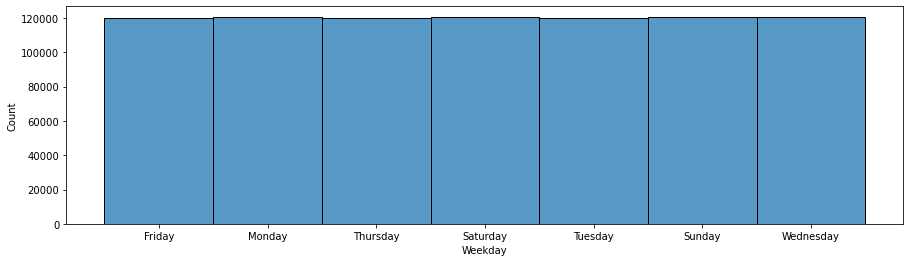

In [13]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Weekday")
plt.show()

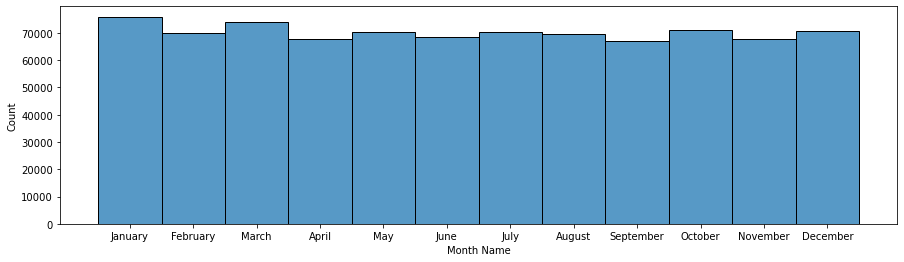

In [14]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Month Name")
plt.show()

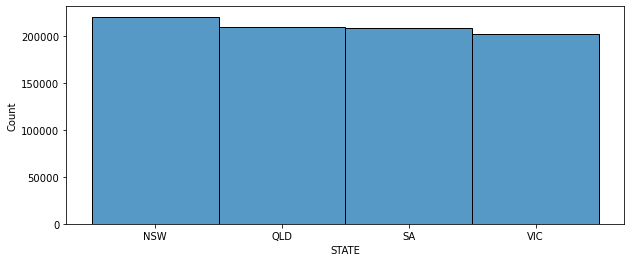

In [15]:
plt.figure(figsize=(10,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="STATE")
plt.show()

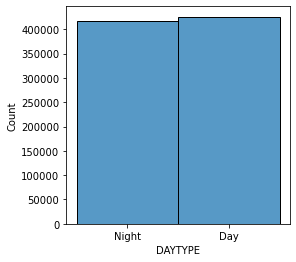

In [16]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="DAYTYPE")
plt.show()

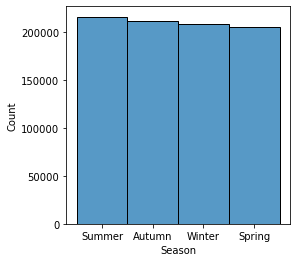

In [17]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Season")
plt.show()

In [18]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.00
DATETIME,0.00
TOTALDEMAND,6.73
LOCATION,7.67
TEMPERATURE,7.67
Weekday,0.00
Quarter,0.00
Month,0.00
Season,0.00
Day,0.00


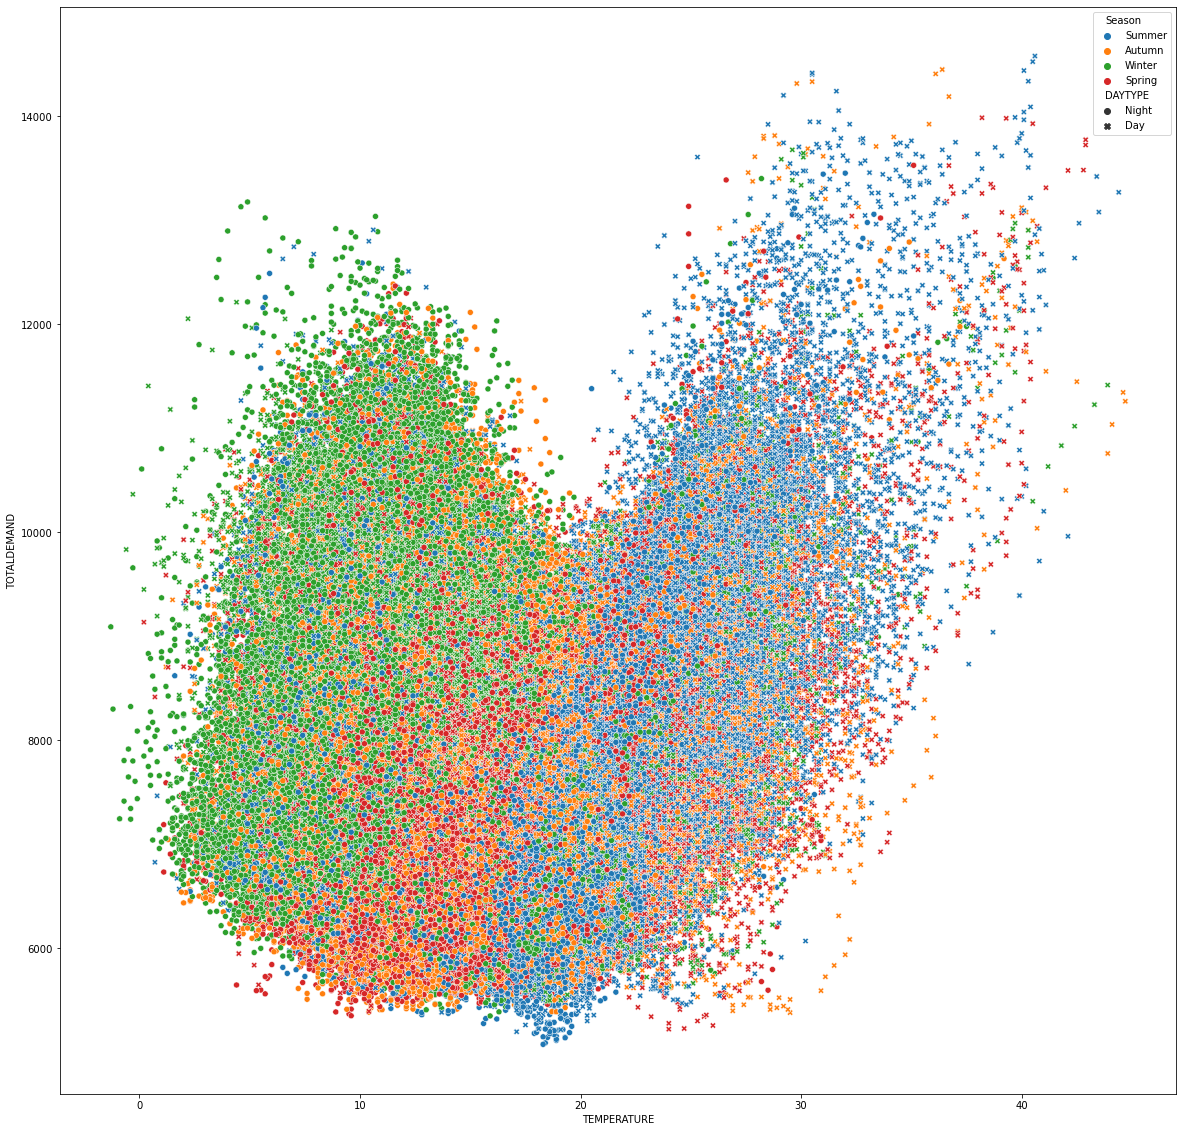

In [19]:
nsw_df = data.loc[data['STATE'] == 'NSW']
plt.figure(figsize=(20,20))
sns.scatterplot(data=nsw_df, x="TEMPERATURE", y="TOTALDEMAND", style = 'DAYTYPE', hue='Season')
plt.show()

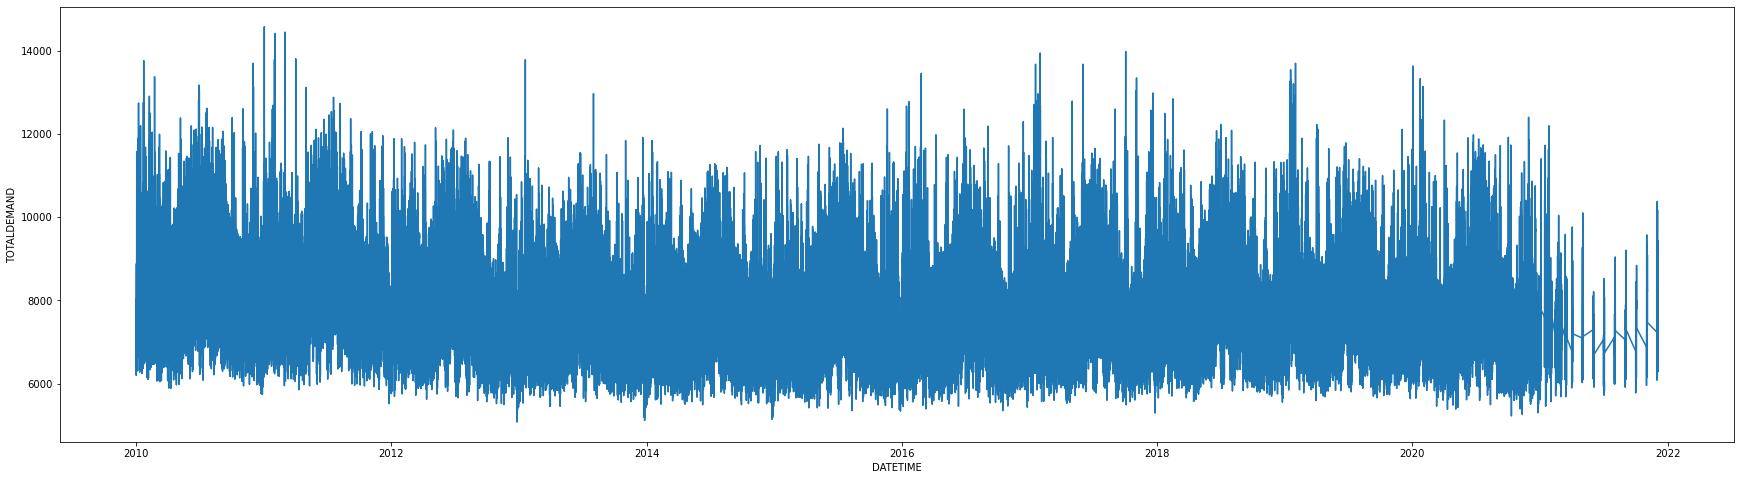

In [21]:
plt.figure(figsize=(30,8))
sns.lineplot(data=nsw_df, x="DATETIME", y="TOTALDEMAND")
plt.show()

In [22]:
nsw_df_2015 = nsw_df.loc[nsw_df['Year'] == 2015]

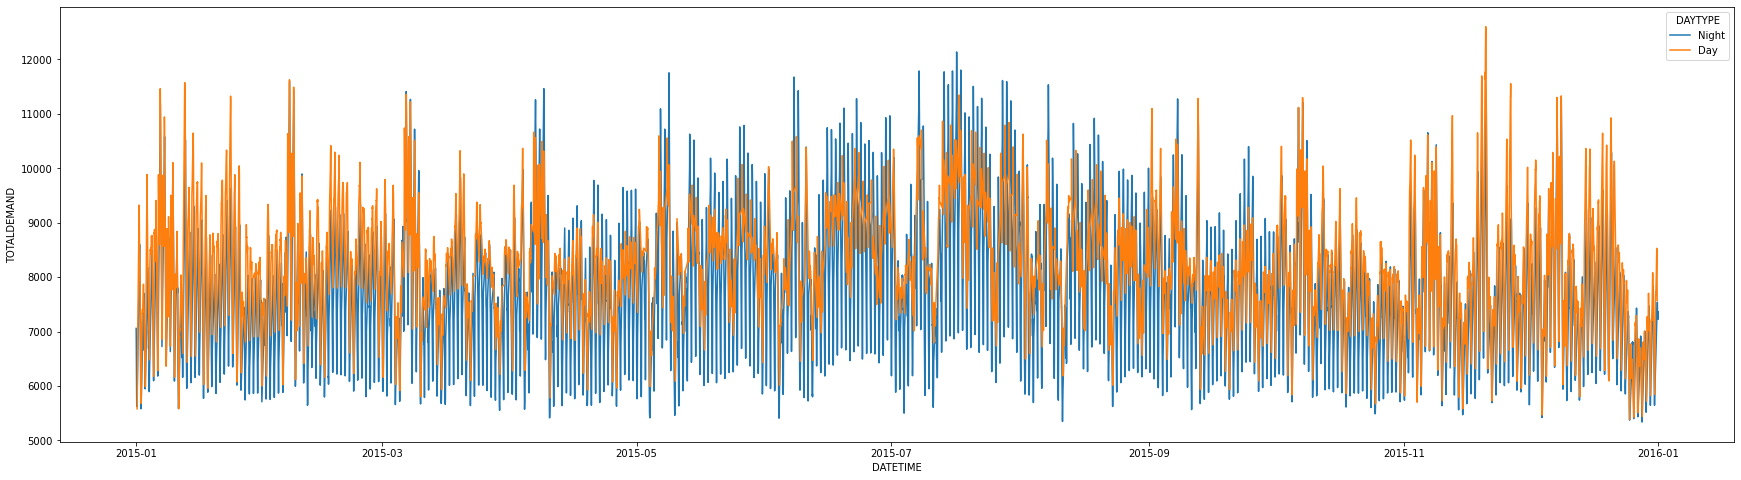

In [33]:
plt.figure(figsize=(30,8))
sns.lineplot(data=nsw_df_2015, x="DATETIME", y="TOTALDEMAND",hue='DAYTYPE')
plt.show()

In [30]:
nsw_yearly_demand = nsw_df.groupby(['Year']).sum()
nsw_yearly_demand.head()

,TOTALDEMAND,TEMPERATURE,Quarter,Month,Day
Year,,,,,
2010,1.543019e+08,327017.8,47955,124543,301017
2011,1.529551e+08,332116.9,49357,128363,313545
2012,1.450010e+08,326276.1,49325,128338,308200
2013,1.398448e+08,349470.1,49971,129877,314856
2014,1.387269e+08,341262.9,49358,128284,308159


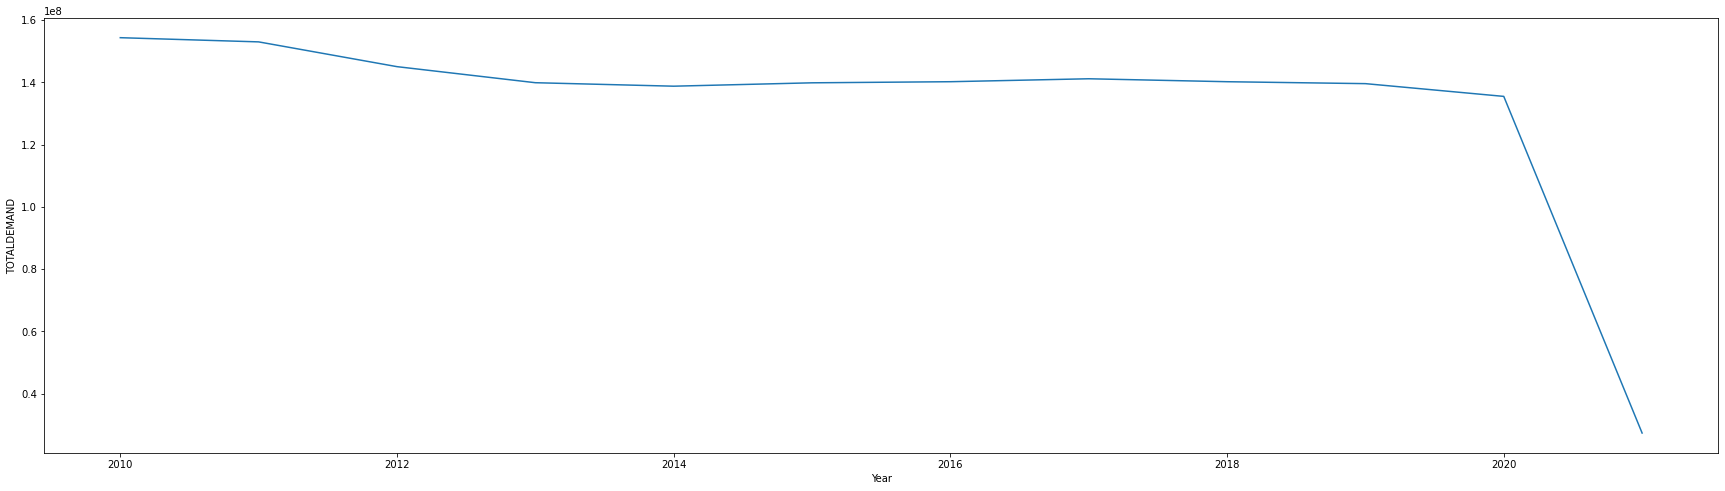

In [32]:
plt.figure(figsize=(30,8))
sns.lineplot(data=nsw_yearly_demand, x="Year", y="TOTALDEMAND")
plt.show()